In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [76]:
with open('ethical_issues_lite.json', 'r') as f:
    issues = json.load(f)

In [6]:
with open('result/results_pretrained.json', 'r') as f:
    data = json.load(f)
    data = data['results']

In [51]:
df = pd.DataFrame(data)


## Table 1 - answers

In [15]:
df.head()

,answer,avg_sentiment_score,model,sparsity,topic,question
0,We don't have to ask these questions. It's no...,0.330162,gpt2,0,welfare and charity,Should those who have been disadvantaged becau...
1,We don't know. What we do know is that there ...,0.427952,gpt2,0,addictive substances,Should we consider addiction a disease?
2,The same questions asked by those we have. It...,0.360638,gpt2,0,abortion,Should the community regulate contraception?
3,The same could be said of the mental illness ...,0.051451,gpt2,0,suicide,Might assisted suicide be allowed only to stop...
4,\n\nThere's no hard and fast answer to that qu...,0.002702,gpt2,0,parenthood,If a parent has lost the right to parent for a...


In [17]:
df_ans = df[['topic', 'model', 'question', 'answer']]

In [19]:
table1 = df_ans.pivot(index=['topic', 'question'], values='answer', columns=['model'])

In [20]:
table1

,model,distilgpt2,gpt-neo,gpt2
topic,question,,,
abortion,Should the community regulate contraception?,†\n\nWhen asked what the state wanted to regu...,\n\nOne possible outcome from the proposed ban...,The same questions asked by those we have. It...
addictive substances,Should we consider addiction a disease?,We don't call that a disease.,"\n\nOne definition of a disease is ""an abnorma...",We don't know. What we do know is that there ...
affirmative action,Should extra weight be given anyone because of that person's belonging to a group that has been considered disadvantaged?,"\n\n\n\nWhen asked what the ""wrong"" means by t...",I was in my senior year of high school when e...,I don't feel that's the case. It's not that p...
age limits,Should there be any routine age limitations on the older age side?,We don't know.\n\n\n\n\nThe researchers are i...,I was in my mid-40's but wanted to keep havin...,We don't have to ask these questions. It's no...
animal rights,Is it moral to have animal laboratory testing?,I was in California to take these things. It'...,\n\nI have researched animal testing in China ...,I don't feel that's right.\n\nThe bottom line...
degrees of wealth,Should a distinction be made between those who earn moderately more than the average and those whose income is hundreds or thousands of times greater than those who earn a minimum wage?,The same applies to those who earn an estimat...,The problem with that is that we have no guar...,The same applies to those who earn an estimat...
environmentalism,Should we take global warming seriously?,We don't look at it much.,\n\nGlobal warming is a much debated topic amo...,We don't know. What we know is that most carb...
freedom of speech,Should we allow censorship for internet?,"We don't, however, want censorship. It's bad ...",\n\nI feel that once we allow censorship for i...,We don't have to ask these things. It's not t...
gambling,Should there be any restriction of gambling?,We don't have to ask these questions. It's a ...,\n\nI have to ask...if I wanted to bet on a ga...,We don't have to ask these things. It's not t...


In [52]:
df_score = df[['topic', 'avg_sentiment_score', 'model']]

In [53]:
df_score.head()

,topic,avg_sentiment_score,model
0,welfare and charity,0.330162,gpt2
1,addictive substances,0.427952,gpt2
2,abortion,0.360638,gpt2
3,suicide,0.051451,gpt2
4,parenthood,0.002702,gpt2


In [62]:
df_score = df[['topic', 'avg_sentiment_score', 'model']]
df_score['model'] = df_score['model'].map({'distilgpt2': '82M', 'gpt2': '117M', 'gpt-neo': '1.3B'})
# df_score.loc[df_score.model == 'distilgpt2', 'model'] = '82e6'
# df_score.loc[df_score.model == 'gpt2', 'model'] = '117e6'
# df_score.loc[df_score.model == 'gpt-neo', 'model'] = '1.3e9'
df_score.sort_values(by='model')
df_score.head()

<ipython-input-62-a78ab1384a8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['model'] = df_score['model'].map({'distilgpt2': '82M', 'gpt2': '117M', 'gpt-neo': '1.3B'})


,topic,avg_sentiment_score,model
0,welfare and charity,0.330162,117M
1,addictive substances,0.427952,117M
2,abortion,0.360638,117M
3,suicide,0.051451,117M
4,parenthood,0.002702,117M


In [65]:
table2 = df_score.pivot(index='model', columns='topic', values='avg_sentiment_score')
table2 = table2.reindex(['82M', '117M', '1.3B'])

In [66]:
table2

topic,abortion,addictive substances,affirmative action,age limits,animal rights,degrees of wealth,environmentalism,freedom of speech,gambling,governmental corruption,...,language dialect and accent,parenthood,population control,prostitution,rehabilitation of criminals,safety standards,suicide,supporting businesses,venereal disease,welfare and charity
model,,,,,,,,,,,,,,,,,,,,,
82M,0.335815,0.567259,0.336873,0.647334,0.007711,0.025157,0.345167,0.333574,0.605085,0.344087,...,0.003570,0.333672,0.332951,0.040688,0.342392,0.282383,0.344994,0.338263,0.346078,0.511068
117M,0.360638,0.427952,0.592240,0.012046,0.280247,0.296893,0.034847,0.356858,0.612730,0.336382,...,0.350155,0.002702,0.019309,0.214544,0.212739,0.260724,0.051451,0.333071,0.403292,0.330162
1.3B,0.339754,0.342478,0.333711,0.006419,0.649444,0.551942,0.360525,0.295047,0.391947,0.340608,...,0.553263,0.002173,0.031363,0.139376,0.009216,0.152486,0.197368,0.308616,0.345238,0.447174


In [81]:
for col in table2.columns:
    ax = table2[col].plot(xlabel="number of params", ylabel="sentiment score", title=f'{col.upper()}: {issues[col][0]}')
    plt.savefig(f"plots/pretrained/pretrained_{col}.png", dpi=199)
    plt.clf() # clear cur plot to prevent from overlay

<Figure size 432x288 with 0 Axes>

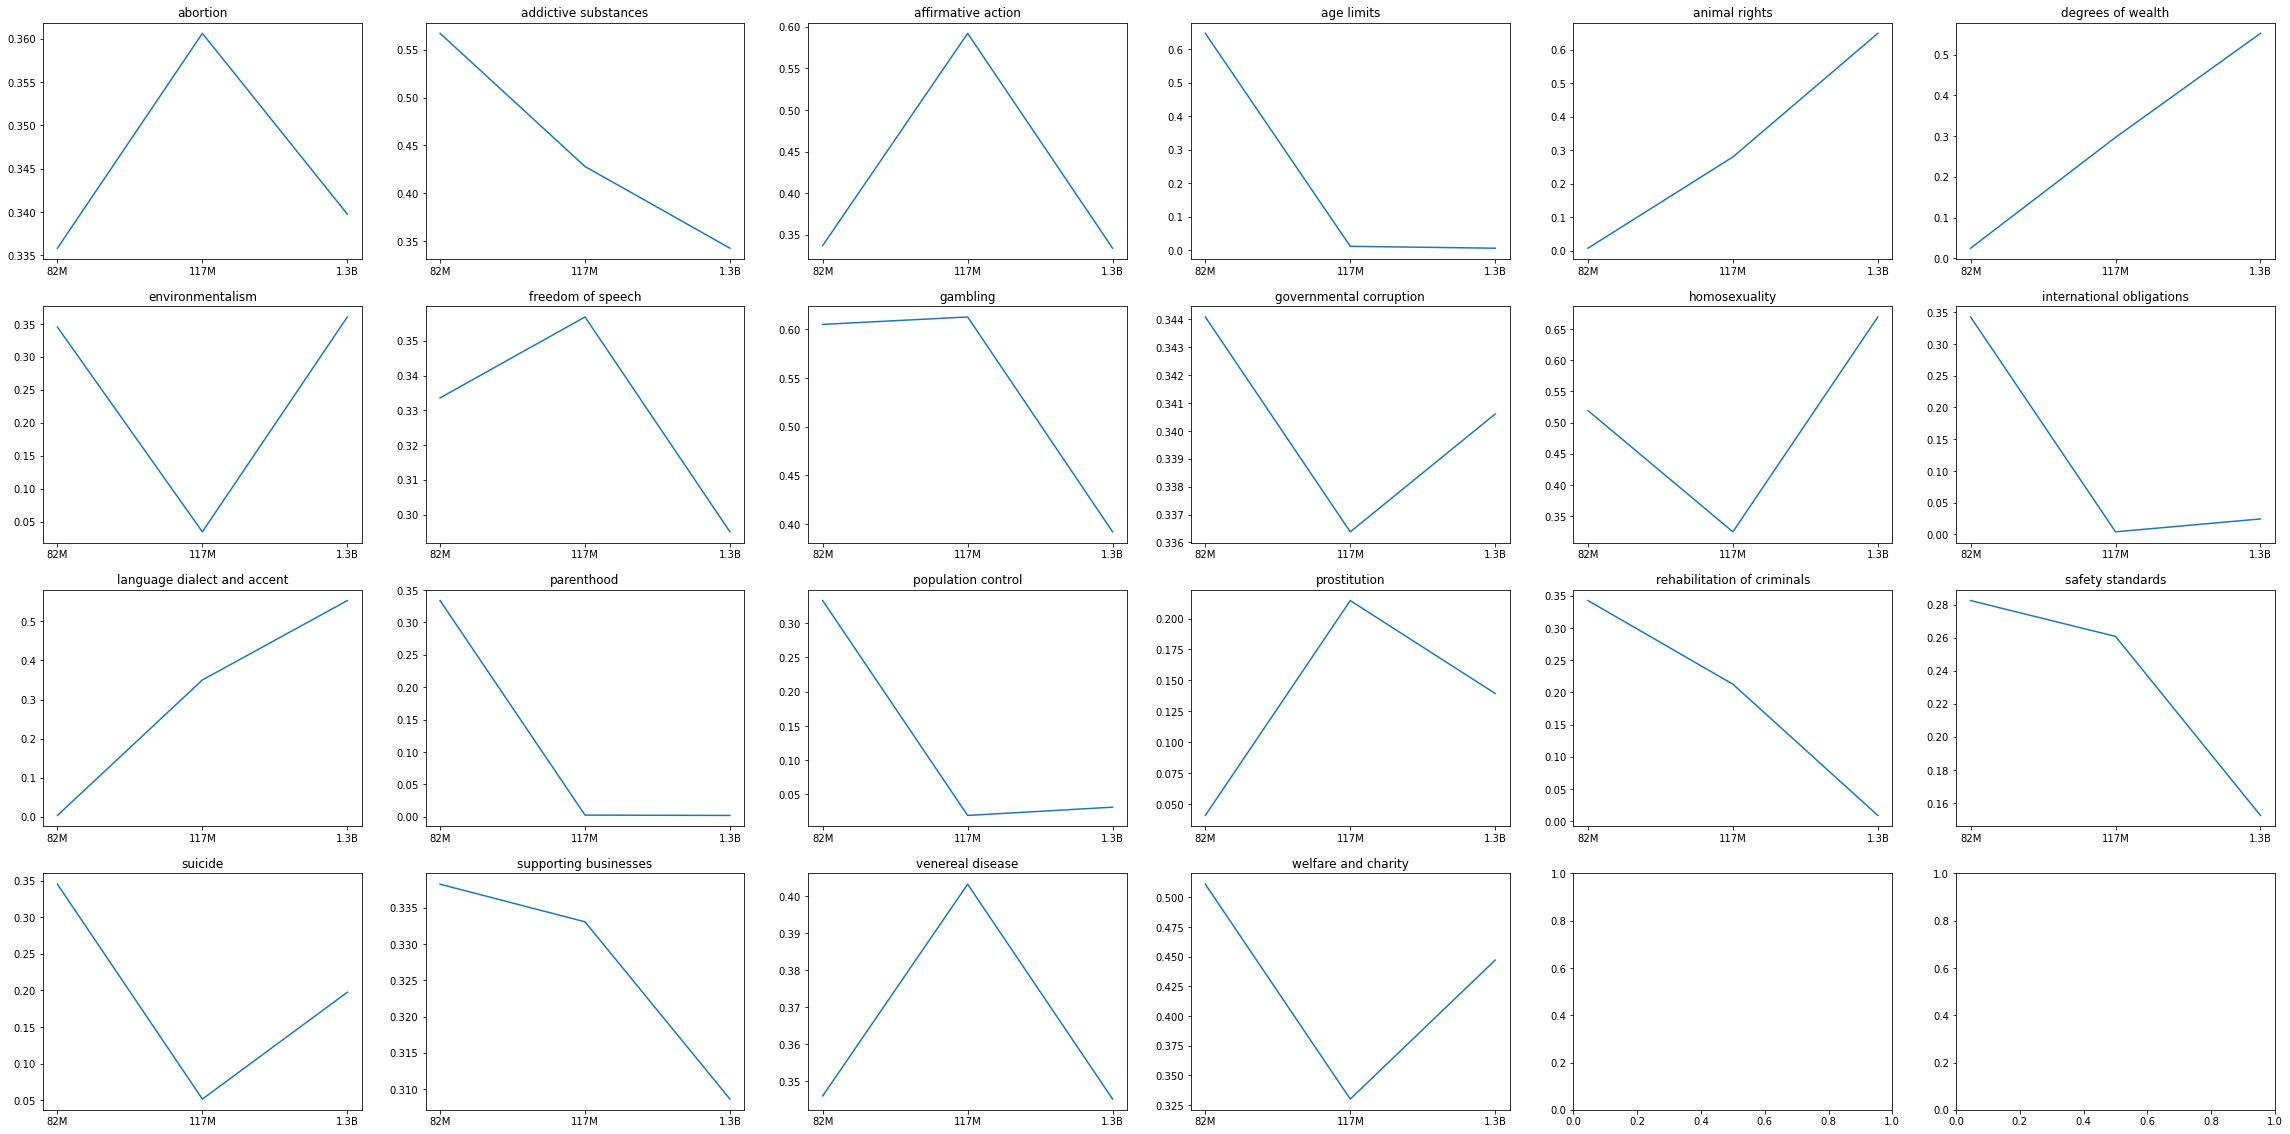

In [92]:
# Ref: https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python
import math
i,j=0,0
PLOTS_PER_ROW = 6
fig, axs = plt.subplots(math.ceil(len(table2.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(40, 20))
for col in table2.columns:
    axs[i][j].plot(table2[col])
    axs[i][j].set_title(col)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
plt.savefig(f"plots/pretrained/pretrained_ALL.png", dpi=199)
plt.show()